# MEMORIA EDA

## TÍTULO

¿Somos libres de elegir lo que escuchamos?

Como Spotify y sus principales playlist editoriales afectan al consumo musical y las listas de éxitos.

## TEMA

Según un estudio realizado por la Federación Internacional de la Industria Fonográfica (IFPI) en 2022, del consumo musical total en España, el 34% fue en straming, ya sea por suscripción o con modelo freemium con anuncios. Si nos fijamos en la radio y la música comprada, representarían solo el 14% y 10% respectivamente. Si hablamos a nivel global, el 24% y 8% lo hacen por streaming de suscripción y freemium, y el 17% y 10% corresponderían a radio y ventas.

Este escenario ha abierto la posibilidad de que cualquiera desde su casa con un micrófono y una aplicación como podría ser FL Studio o Logic Pro, puede hacer una canción, mezclarla, masterizarla y distribuirla. Un proceso que antaño era mucho más lento, caro y cuyo éxito dependía, en gran medida, de si conseguías un buen contrato discográfico y la presencia de las canciones en radios. Ahora directamente subiendo a plataformas de streaming, puedes tener un éxito de la noche a la mañana. 

Ante este nuevo paradigma de consumo la pregunta que debemos plantearnos es: ¿qué papel han asumido las plataformas de streaming dentro del negocio de la música? 

En este estudio trataremos de ver la influencia de Spotify, plataforma de streaming por excelencia, en las listas de ventas españolas e internacionales. ¿Por qué rara vez vemos artistas independientes copar las listas de éxitos? ¿Qué influencia tienen los sellos multinacionales en el algoritmo de Spotify y sus playlist editoriales?

## HIPÓTESIS

Empezaremos este EDA planteando varias hipótesis: 

- Por un lado, la hipótesis principal del proyecto es que la música que escuchamos está influenciada, en gran medida por lo que el algoritmo de Spotify y sus playlist editoriales (influenciadas por grupos multinacionales como Sony, Universal o Warner con participación accionarial en la empresa). Para ver hasta donde llega esta influencia, compararemos la principal lista de ventas española (Promusicae) e internacional(Billboard Global), con sus homónimas en Spotify, así como las principales playlist editoriales. Tratando así de ver la influencia de las propias plataformas en la elección del consumo. 

- Por otro lado, veremos que peso real que tiene el streaming en las ventas totales. Mediante la comparación de las listas de éxitos totales con las particulares de Spotify.

## OBTENCIÓN DE LOS DATOS

Vamos a extraer todas las playlist de la API de Spotify, Spotify for Developers. Para ello tenemos que crearnos una app dentro de su web y nos dan las credenciales. Una vez tenemos esas claves ya podemos acceder a las playlist.

Antes de nada, descargaremos la lista de ventas española e internacional de los órganos oficiales. En el caso Español, la lista de ventas la realiza Promusicae(Productores de Música de España) junto a Agedi (Entedidad Gestión de Derechos de Propiedad Intelectual). En el caso internacional, utilizaremos la lista Billboard Global 200. 

Por suerte, ambas listas oficiales cuentan con su respectiva playlist en Spotify que van actualizando semanalmente por lo que extraeremos de ahí los datos necesarios para una mayor compatibilidad con las playlist editoriales.

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

def export_playlist_to_csv(playlist_id, client_id, client_secret, csv_filename):
    # Credenciales de la API de Spotify
    client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

    # Datos de la lista de reproducción
    results = sp.playlist(playlist_id)
    tracks = results['tracks']['items']

    # Procesamos los datos
    playlist_data = []
    for track in tracks:
        album = track['track']['album']
        track_data = {
            'Track Name': track['track']['name'],
            'Artist': track['track']['artists'][0]['name'],
            'Album': album['name'],
            'Release Date': album['release_date'],
            'Label': ''
        }

        # Obtenemos información adicional del sello discográfico
        album_details = sp.album(album['id'])
        if 'label' in album_details:
            track_data['Label'] = album_details['label']
        playlist_data.append(track_data)

    # Creamos un DataFrame
    df = pd.DataFrame(playlist_data)

    # Exportamos el DataFrame a un archivo CSV
    df.to_csv(csv_filename, index=False)



In [6]:
export_playlist_to_csv ('37i9dQZEVXbJwoKy8qKpHG','40855ddf3bd54d9d9c01b10b8bbf8fe8','d299e678564846c08fba7227c787e7c8','df_esp_sem.csv')

In [7]:
# Lista oficial española

df_esp_sem = pd.read_csv('df_esp_sem.csv')

df_esp_sem

,Track Name,Artist,Album,Release Date,Label
0,WHERE SHE GOES,Bad Bunny,WHERE SHE GOES,2023-05-18,Rimas Entertainment LLC
1,Acróstico,Shakira,Acróstico,2023-05-11,Sony Music Latin
2,Supernova,Saiko,Supernova,2023-04-19,2023 SAIKO
3,EL TONTO,Lola Indigo,EL DRAGÓN,2023-04-13,Universal Music Spain S.L.
4,El Merengue,Marshmello,El Merengue,2023-03-03,Sony Music Latin
5,BESO,ROSALÍA,RR,2023-03-24,Columbia Records/Duars Entertainment/Sony Musi...
6,Clavaito,Chanel,Clavaito,2023-04-27,Sony Music Entertainment
7,Mami Chula,Jhayco,Mami Chula,2023-04-28,N&E Entertainment LLC
8,Classy 101,Feid,Classy 101,2023-03-31,UMLE - Latino
9,Nochentera,Vicco,Nochentera,2022-12-19,Sony Music Entertainment


In [8]:
export_playlist_to_csv ('5VFjprCLCaXC6sTTUbrIj5','40855ddf3bd54d9d9c01b10b8bbf8fe8','d299e678564846c08fba7227c787e7c8','df_int_sem.csv')

In [9]:
# Lista oficial internacional

df_int_sem = pd.read_csv('df_int_sem.csv')

df_int_sem

,Track Name,Artist,Album,Release Date,Label
0,Ella Baila Sola,Eslabon Armado,Ella Baila Sola,2023-03-16,DEL Records
1,Cupid - Twin Ver.,FIFTY FIFTY,The Beginning: Cupid,2023-02-24,WM Korea
2,La Bebe - Remix,Yng Lvcas,La Bebe (Remix),2023-03-17,WM Mexico
3,un x100to,Grupo Frontera,un x100to,2023-04-17,Rimas Entertainment LLC.
4,Flowers,Miley Cyrus,Flowers,2023-01-13,Columbia
...,...,...,...,...,...
95,Ojitos Lindos,Bad Bunny,Un Verano Sin Ti,2022-05-06,Rimas Entertainment LLC
96,Ch y la Pizza,Fuerza Regida,Ch y la Pizza,2022-12-01,Rancho Humilde/Street Mob Records
97,Sweater Weather,The Neighbourhood,I Love You.,2013-04-19,Columbia
98,Coco Chanel,Eladio Carrion,3MEN2 KBRN,2023-03-17,Rimas Entertainment LLC


Ahora vamos a ver cuantas qué porcentaje de canciones de cada lista pertenece a los tres grandes sellos discográficos (Sony, Universal y Warner). Para ello crearemos una función que:

- Recoja todos los nombres o etiquetas posibles de cada sello discográfico (en cada región el nombre de la discográfica es distinto y necesitamos unificarlo).

- Nos etiquete cada sello que solo aparezca una vez en la lista como 'Otros', para así dejar más limpios los gráficos, ya que se entiende que son disqueras independientes.

- Cree un gráfico tarta con los porcentajes de cada sello.



In [13]:
import matplotlib
import matplotlib.pyplot as plt

def plot_pie_chart(dataframe):
    dataframe['Label'] = dataframe['Label'].replace({
        'Sony Music Entertainment': 'Sony Music',
        'Sony Music Latin': 'Sony Music',
        'Columbia Records/Duars Entertainment/Sony Musi...': 'Sony Music',
        'Sony Music Latin/DALE PLAY Records': 'Sony Music',
        'Sony Music Argentina': 'Sony Music',
        'Sony Music Latin/Duars Entertainment': 'Sony Music',
        'Columbia': 'Sony Music',
        'Columbia Records/Duars Entertainment/Sony Music Latin': 'Sony Music',
        'WM Spain': 'Warner Music',
        'WM Mexico': 'Warner Music',
        'WEA Latina': 'Warner Music',
        'WM Korea': 'Warner Music',
        'Warner Records': 'Warner Music',
        'Rimas Entertainment LLC.':'Rimas Entertainment LLC',
        'UMLE - Latino': 'Universal Music',
        'Universal Music Spain S.L.': 'Universal Music',
        'Virgin Music Spain': 'Universal Music',
        'Universal Music Argentina S.A.': 'Universal Music',
        'Universal Music AB': 'Universal Music',
        'Republic Records': 'Universal Music',
        'Universal Republic Records': 'Universal Music',
        'Universal-Island Records Ltd.': 'Universal Music',
        'OVO/Republic Records': 'Universal Music',
        'Universal Music Mexico': 'Universal Music',
        'XO / Republic Records': 'Universal Music'
    })
    
    frecuencias = dataframe['Label'].value_counts()
    valores_unicos = frecuencias[frecuencias == 1].index
    dataframe.loc[dataframe['Label'].isin(valores_unicos), 'Label'] = 'Otros'
    
    porcentajes = dataframe['Label'].value_counts(normalize=True) * 100
    valores = porcentajes.values
    etiquetas = [f'{etiqueta} ({porcentaje:.1f}%)' for etiqueta, porcentaje in zip(porcentajes.index, porcentajes.values)]
    
    plt.pie(valores, labels=etiquetas, autopct='%1.1f%%')
    plt.title('Distribución de Sellos Discográficos')
    plt.show()

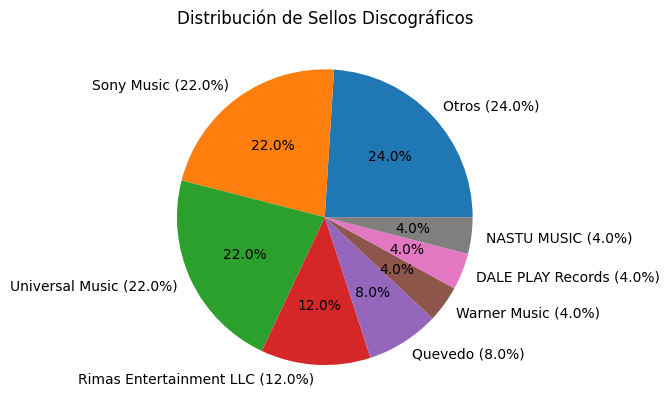

In [14]:
plot_pie_chart (df_esp_sem)

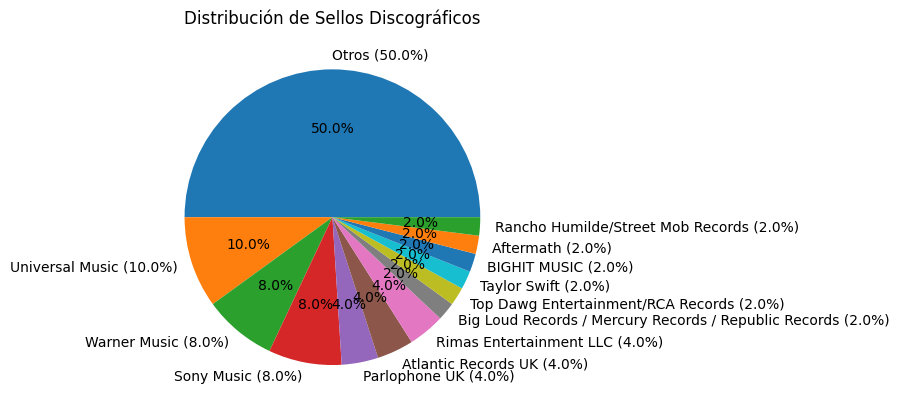

In [15]:
plot_pie_chart (df_int_sem)

Como podemos ver, a nivel español, casi la mitad de la cuota de mercado la copan Sony y Universal Music(22% en ambos casos), mientras que Warner se queda con un 4%. Cabe destacar que la disquera independiente Rimas, que lleva a artistas como Bad Bunny, Eladio Carrión o Arcángel, tiene un 12% de cuota. También Quevedo, artista independiente, tiene un 8%.

A nivel internacional está todo mucho más repartido, desmarcándose Universal Music con un 10%, mientras que Sony y Warner cuentan con un 8% de cuota cada una.

Ahora, vamos a comparar las listas de éxitos oficiales con los tops de Spotify, nacional e internacional.

In [18]:
export_playlist_to_csv ('37i9dQZEVXbNFJfN1Vw8d9','40855ddf3bd54d9d9c01b10b8bbf8fe8','d299e678564846c08fba7227c787e7c8','df_esp_spfy.csv')
export_playlist_to_csv ('37i9dQZEVXbMDoHDwVN2tF','40855ddf3bd54d9d9c01b10b8bbf8fe8','d299e678564846c08fba7227c787e7c8','df_int_spfy.csv')


In [23]:
# Top 50 Spotify nacional

df_esp_spfy = pd.read_csv('df_esp_spfy.csv')
df_esp_spfy.head(10)

,Track Name,Artist,Album,Release Date,Label
0,WHERE SHE GOES,Bad Bunny,WHERE SHE GOES,2023-05-18,Rimas Entertainment LLC
1,Acróstico,Shakira,Acróstico,2023-05-11,Sony Music Latin
2,Supernova,Saiko,Supernova,2023-04-19,2023 SAIKO
3,EL TONTO,Lola Indigo,EL DRAGÓN,2023-04-13,Universal Music Spain S.L.
4,El Merengue,Marshmello,El Merengue,2023-03-03,Sony Music Latin
5,BESO,ROSALÍA,RR,2023-03-24,Columbia Records/Duars Entertainment/Sony Musi...
6,VAGABUNDO,Sebastian Yatra,VAGABUNDO,2023-05-12,UMLE - Latino
7,Clavaito,Chanel,Clavaito,2023-04-27,Sony Music Entertainment
8,Nochentera,Vicco,Nochentera,2022-12-19,Sony Music Entertainment
9,Sangre y Fe,Cruz Cafuné,Me Muevo Con Dios,2023-05-25,MÉCÈN Ent.


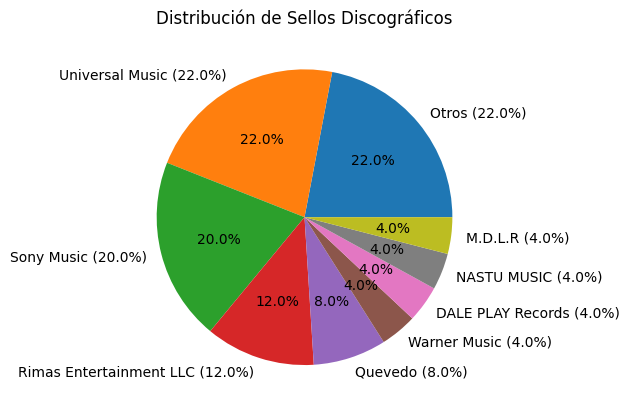

In [20]:
plot_pie_chart (df_esp_spfy)

Vemos que el top 50 de Spotify y el oficial a nivel nacional es prácticamente idéntico.

In [22]:
# Top 50 Spotify internacional

df_int_spfy = pd.read_csv('df_int_spfy.csv')
df_int_spfy.head(10)

,Track Name,Artist,Album,Release Date,Label
0,Ella Baila Sola,Eslabon Armado,DESVELADO,2023-04-28,DEL Records
1,La Bebe - Remix,Yng Lvcas,La Bebe (Remix),2023-03-17,WM Mexico
2,WHERE SHE GOES,Bad Bunny,WHERE SHE GOES,2023-05-18,Rimas Entertainment LLC
3,un x100to,Grupo Frontera,un x100to,2023-04-17,Rimas Entertainment LLC.
4,Cupid - Twin Ver.,FIFTY FIFTY,The Beginning: Cupid,2023-02-24,WM Korea
5,Flowers,Miley Cyrus,Endless Summer Vacation,2023-03-10,Columbia
6,Kill Bill,SZA,SOS,2022-12-08,Top Dawg Entertainment/RCA Records
7,As It Was,Harry Styles,Harry's House,2022-05-20,Columbia
8,Daylight,David Kushner,Daylight,2023-04-14,"Miserable Music Group, LLC"
9,TQM,Fuerza Regida,TQM,2023-05-19,Rancho Humilde/Street Mob Records


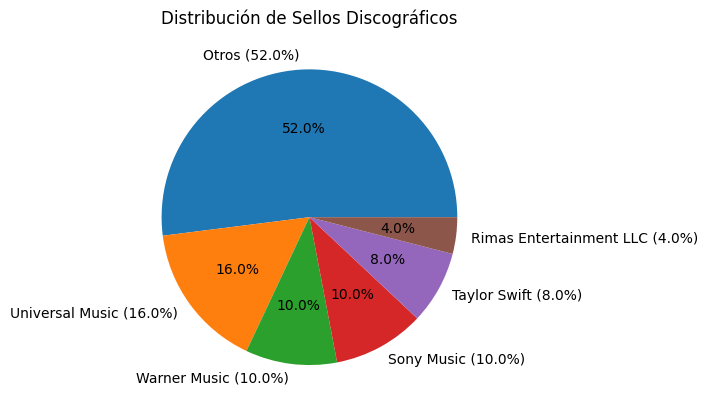

In [21]:
plot_pie_chart (df_int_spfy)

Mientras que a nivel global si que cambian y vemos como está todo mucho más concentrado, con las grandes discográficas con algo más de presencia y con Taylor Swift ocupando casi lo mismo que Sony y Warner. Cabe destacar el 52% de sellos o artistas independientes que solo cuentan con una canción en el ranking.

Continuamos visualizando las principales playlist editoriales nacionales: Éxitos España, Pop con Ñ y PEGAO.

Apunte: las playlist elegidas son las principales que incluyen temas actuales, no necesariamente las que más seguidores tienen. Muchas de las listas más seguidas como 'Míticas' o 'Los 2000 en España' cuentan con temas antiguos que no tienen relación con las listas de éxitos actuales y el estado de la industria musical.

In [24]:
export_playlist_to_csv ('37i9dQZF1DXaxEKcoCdWHD','40855ddf3bd54d9d9c01b10b8bbf8fe8','d299e678564846c08fba7227c787e7c8','exitos_españa.csv')
export_playlist_to_csv ('37i9dQZF1DX3sCT1ItXgNd','40855ddf3bd54d9d9c01b10b8bbf8fe8','d299e678564846c08fba7227c787e7c8','pop_con_ñ.csv')
export_playlist_to_csv ('37i9dQZF1DX1HCSfq0nSal','40855ddf3bd54d9d9c01b10b8bbf8fe8','d299e678564846c08fba7227c787e7c8','pegao.csv')


In [25]:
# Playlist Editorial Éxitos España

df_exit_esp = pd.read_csv('exitos_españa.csv')
df_exit_esp.head(10)

,Track Name,Artist,Album,Release Date,Label
0,WHERE SHE GOES,Bad Bunny,WHERE SHE GOES,2023-05-18,Rimas Entertainment LLC
1,Clavaito,Chanel,Clavaito,2023-04-27,Sony Music Entertainment
2,Supernova,Saiko,Supernova,2023-04-19,2023 SAIKO
3,VAGABUNDO,Sebastian Yatra,VAGABUNDO,2023-05-12,UMLE - Latino
4,EL TONTO,Lola Indigo,EL DRAGÓN,2023-04-13,Universal Music Spain S.L.
5,Arena y Sal,Omar Montes,Arena y Sal,2023-05-18,Sony Music Latin
6,Acróstico,Shakira,Acróstico,2023-05-11,Sony Music Latin
7,La Bebe - Remix,Yng Lvcas,La Bebe (Remix),2023-03-17,WM Mexico
8,Sangre y Fe,Cruz Cafuné,Me Muevo Con Dios,2023-05-25,MÉCÈN Ent.
9,Niña Bonita,Feid,Niña Bonita,2023-04-21,UMLE - Latino


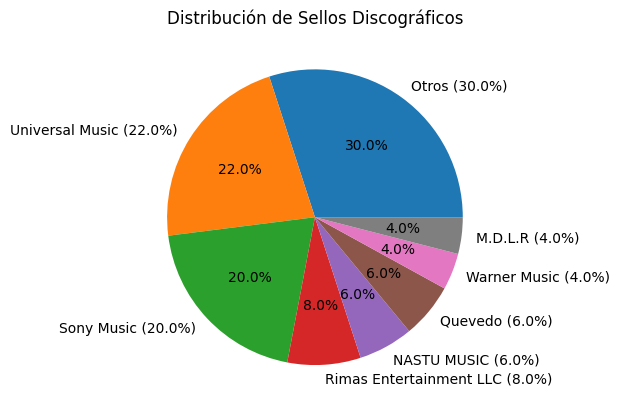

In [26]:
plot_pie_chart (df_exit_esp)

Vemos que el reparto es muy parecido al resto de casos nacionales.

In [27]:
# Playlist Pop con Ñ

df_pop_ñ = pd.read_csv('pop_con_ñ.csv')
df_pop_ñ.head(10)

,Track Name,Artist,Album,Release Date,Label
0,Acróstico,Shakira,Acróstico,2023-05-11,Sony Music Latin
1,VAGABUNDO,Sebastian Yatra,VAGABUNDO,2023-05-12,UMLE - Latino
2,Clavaito,Chanel,Clavaito,2023-04-27,Sony Music Entertainment
3,Algo Sencillito,Marta Santos,Algo Sencillito,2023-05-18,Virgin Music Spain
4,Todo Contigo,Álvaro De Luna,Todo Contigo,2023-03-17,WM Spain
5,EL TONTO,Lola Indigo,EL DRAGÓN,2023-04-13,Universal Music Spain S.L.
6,Coti x Coti,The Tyets,Coti x Coti,2023-02-17,Luup Records
7,La Fiesta,Pedro Capó,La Fiesta,2022-04-29,Sony Music Latin
8,El Merengue,Marshmello,El Merengue,2023-03-03,Sony Music Latin
9,P.M.,Chanel,P.M.,2023-05-19,Sony Music Entertainment


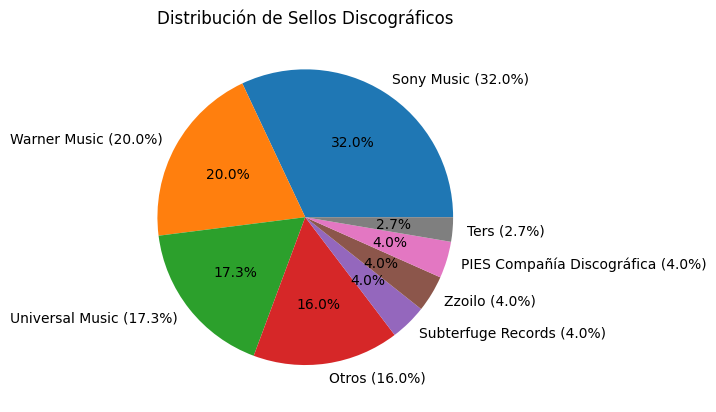

In [28]:
plot_pie_chart(df_pop_ñ)

Aquí, vemos un gran crecimiento de las multinacionales, con casi un 70% de la cuota de mercado. Destaca Sony con un 32%. Aunque lo más interesante es como Warner consigue pasar de un 4% en las listas de ventas y escuchas a una representación de un 20% en la playlist editorial más importante de España. Por otro lado, Rimas, muy oresente en el resto de charts está ausente aquí.

In [29]:
# Playlist Pegao

df_pegao = pd.read_csv('pegao.csv')
df_pegao.head(10)

,Track Name,Artist,Album,Release Date,Label
0,Sangre y Fe,Cruz Cafuné,Me Muevo Con Dios,2023-05-25,MÉCÈN Ent.
1,WHERE SHE GOES,Bad Bunny,WHERE SHE GOES,2023-05-18,Rimas Entertainment LLC
2,Pacto (feat. Luar La L),Jay Wheeler,Pacto (feat. Luar La L),2023-04-24,Linked Music / Dynamic Records / EMPIRE
3,69,Nicky Jam,69,2023-05-19,Sony Music Latin
4,Sígueme - Remix,Feid,Sígueme (Remix),2019-02-01,JP Entertainment (Jorge Pino)
5,Corazón Roto - Remix,Brray,Corazón Roto (Remix),2023-04-07,UMLE - Latino
6,Arena y Sal,Omar Montes,Arena y Sal,2023-05-18,Sony Music Latin
7,Capitán,Rvfv,Capitán,2023-05-26,NASTU MUSIC
8,Mami Chula,Jhayco,Mami Chula,2023-04-28,N&E Entertainment LLC
9,QUE RICO (w/ Bad Gyal),Un Titico,QUE RICO (w/ Bad Gyal),2023-05-18,"2023 Calientalo Media / WK Records / Bad Gyal,..."


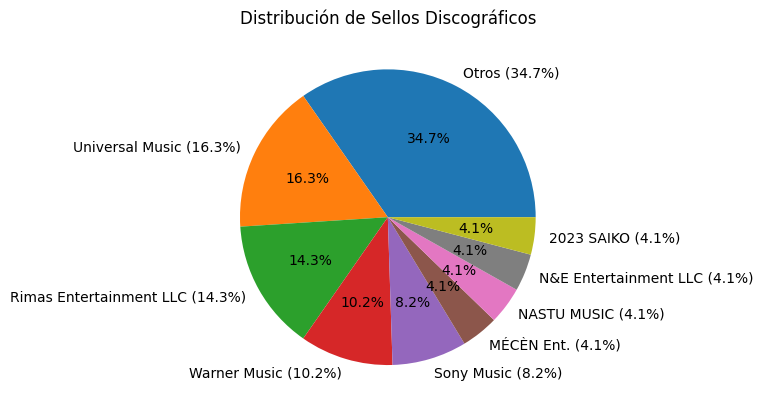

In [30]:
plot_pie_chart(df_pegao)

En esta playlist, más relacionada con el mundo urbano vemos como Sony pierde terreno ante sus competidoras y Rimas vuelve a quedarse con una buena porción del pastel.

Vayamos con las playlist internacionales. En este caso hemos seleccionado: Today's Top Hits (lista de éxitos editorial más importante a nivel global), La Lista Pop (playlist editorial más relevante a nivel latino), RapCaviar (playlist temática con más seguidores: 15M).

In [31]:
export_playlist_to_csv ('37i9dQZF1DXcBWIGoYBM5M','40855ddf3bd54d9d9c01b10b8bbf8fe8','d299e678564846c08fba7227c787e7c8','TTH.csv')
export_playlist_to_csv ('37i9dQZF1DWSpF87bP6JSF','40855ddf3bd54d9d9c01b10b8bbf8fe8','d299e678564846c08fba7227c787e7c8','lista_pop.csv')
export_playlist_to_csv ('37i9dQZF1DX0XUsuxWHRQd','40855ddf3bd54d9d9c01b10b8bbf8fe8','d299e678564846c08fba7227c787e7c8','rap_caviar.csv')

In [32]:
# Playlist Today's Top Hits

df_tth = pd.read_csv('TTH.csv')
df_tth.head(10)

,Track Name,Artist,Album,Release Date,Label
0,Dance The Night (From Barbie The Album),Dua Lipa,Dance The Night (From Barbie The Album),2023-05-25,Atlantic Records
1,Flowers,Miley Cyrus,Flowers,2023-01-13,Columbia
2,WHERE SHE GOES,Bad Bunny,WHERE SHE GOES,2023-05-18,Rimas Entertainment LLC
3,Kill Bill,SZA,SOS,2022-12-08,Top Dawg Entertainment/RCA Records
4,Cupid - Twin Ver.,FIFTY FIFTY,The Beginning: Cupid,2023-02-24,WM Korea
5,Calm Down (with Selena Gomez),Rema,Calm Down (with Selena Gomez),2022-08-25,Mavin Records / Jonzing World
6,As It Was,Harry Styles,As It Was,2022-03-31,Columbia
7,Die For You - Remix,The Weeknd,Die For You (Remix),2023-02-24,XO / Republic Records
8,People,Libianca,People,2022-12-06,5K Records Limited
9,Boy's a Liar Pt. 2,PinkPantheress,Boy's a liar Pt. 2,2023-02-03,Warner Records


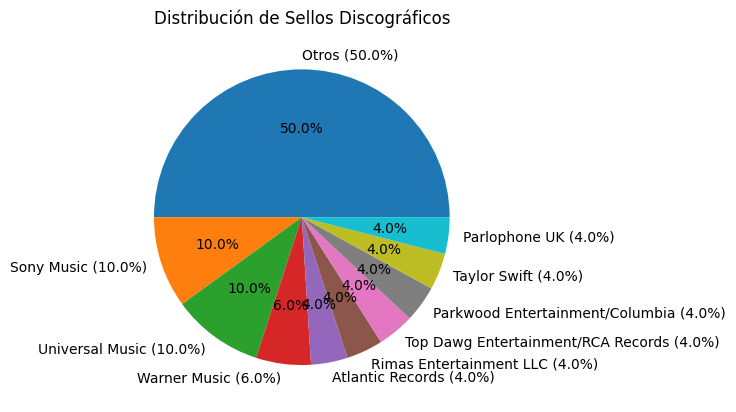

In [33]:
plot_pie_chart(df_tth)

Vemos que el reparto es parecido al de las listas de éxitos internacionales. Con las multinacionales dominando por poco y un agran presencia de sellos y artistas independientes. 

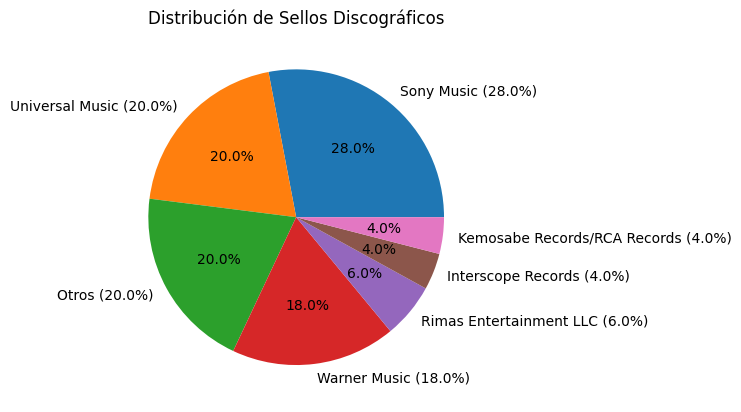

In [34]:
# Playlist La Lista Pop

df_lista_pop = pd.read_csv('lista_pop.csv')
df_lista_pop.head(10)

plot_pie_chart(df_lista_pop)

Como veíamos en el caso de Pop con Ñ, aquí vuelve a haber más espacio para las multinacionales, que entre las 3 tinen un 66% de la cuota.

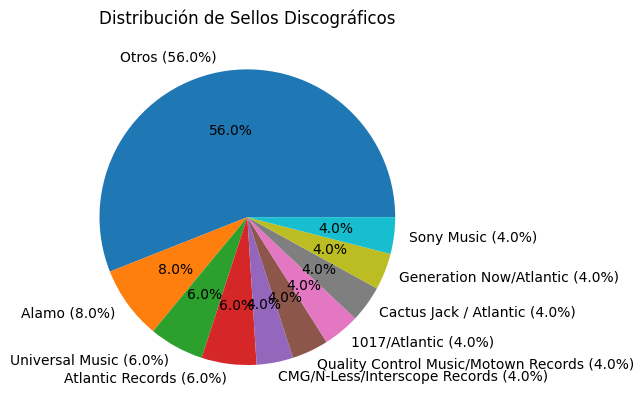

In [35]:
# Playlist RapCaviar

df_rapcaviar = pd.read_csv('rap_caviar.csv')
df_rapcaviar.head(10)

plot_pie_chart(df_rapcaviar)

Aquí, vemos que la cuota está muy repartida. Esto es especialmente interesante porque incita a pensar que en el mercado norteamericano, se premia mucho más a los artistas independientes, especialmente en el cmpo del rap.

Como conclusión de la visualización de estas playlist y el tratamiento de sus datos, podemos ver que generalmente el mercado hispano está mucho más copado por grandes sellos discográficos o independientes con capital de estos, como puede ser Rimas o DALE PLAY. Mientras que el mercado internacional o estadounidense tiene a premiar más a los artistas y sellos independentes. 

Para finalizar, vamos a ver cuantas de las canciones de las listas se encuentran en las listas de ventas y si estas pertenecen a artistas independientes o no.

In [37]:
df_merge_exit_esp_spfy = pd.merge(df_exit_esp[['Track Name','Artist']], df_esp_spfy[['Track Name','Artist']], on=['Track Name','Artist'], how='inner')

df_merge_exit_esp_spfy

,Track Name,Artist
0,WHERE SHE GOES,Bad Bunny
1,Clavaito,Chanel
2,Supernova,Saiko
3,VAGABUNDO,Sebastian Yatra
4,EL TONTO,Lola Indigo
5,Arena y Sal,Omar Montes
6,Acróstico,Shakira
7,La Bebe - Remix,Yng Lvcas
8,Sangre y Fe,Cruz Cafuné
9,Niña Bonita,Feid


In [40]:
df_merge_ñ_esp_spfy = pd.merge(df_pop_ñ[['Track Name','Artist']], df_esp_spfy[['Track Name','Artist']], on=['Track Name','Artist'], how='inner')

df_merge_ñ_esp_spfy

,Track Name,Artist
0,Acróstico,Shakira
1,VAGABUNDO,Sebastian Yatra
2,Clavaito,Chanel
3,Todo Contigo,Álvaro De Luna
4,EL TONTO,Lola Indigo
5,El Merengue,Marshmello
6,Nochentera,Vicco
7,Arranca (feat. Omega),Becky G
8,Los Ángeles,Aitana
9,Cupido,TINI


In [41]:
df_merge_pegao_esp_spfy = pd.merge(df_pegao[['Track Name','Artist']], df_esp_spfy[['Track Name','Artist']], on=['Track Name','Artist'], how='inner')

df_merge_pegao_esp_spfy

,Track Name,Artist
0,Sangre y Fe,Cruz Cafuné
1,WHERE SHE GOES,Bad Bunny
2,69,Nicky Jam
3,Arena y Sal,Omar Montes
4,Mami Chula,Jhayco
5,Supernova,Saiko
6,Que te vaya bien,Rvfv
7,Andando,Morad
8,Classy 101,Feid
9,Si La Calle Llama - Remix,Eladio Carrion


In [42]:
df_merge_tth_int_spfy = pd.merge(df_tth[['Track Name','Artist']], df_int_spfy[['Track Name','Artist']], on=['Track Name','Artist'], how='inner')

df_merge_tth_int_spfy

,Track Name,Artist
0,Dance The Night (From Barbie The Album),Dua Lipa
1,Flowers,Miley Cyrus
2,WHERE SHE GOES,Bad Bunny
3,Kill Bill,SZA
4,Cupid - Twin Ver.,FIFTY FIFTY
5,Calm Down (with Selena Gomez),Rema
6,As It Was,Harry Styles
7,People,Libianca
8,Boy's a Liar Pt. 2,PinkPantheress
9,All My Life (feat. J. Cole),Lil Durk


In [43]:
df_merge_tth_int_spfy = pd.merge(df_lista_pop[['Track Name','Artist']], df_int_spfy[['Track Name','Artist']], on=['Track Name','Artist'], how='inner')

df_merge_tth_int_spfy

,Track Name,Artist
0,Acróstico,Shakira
1,un x100to,Grupo Frontera
2,BESO,ROSALÍA
3,WHERE SHE GOES,Bad Bunny
4,TQG,KAROL G
5,La Bachata,Manuel Turizo
6,"Shakira: Bzrp Music Sessions, Vol. 53",Bizarrap


De La Lista Pop, que es la playlist editorial internacioanl con más presencia de los sellos multinacionales, solo encontramos 7 temas que están realmente en las listas de éxtios. 

In [44]:
df_merge_rap_int_spfy = pd.merge(df_rapcaviar[['Track Name','Artist']], df_int_spfy[['Track Name','Artist']], on=['Track Name','Artist'], how='inner')

df_merge_rap_int_spfy

,Track Name,Artist
0,All My Life (feat. J. Cole),Lil Durk


De la playlist RapCaviar, con diferencia la que menos presencia de sellos multinacionales tiene, solo encontramos un tema que está en la lista de éxitos.

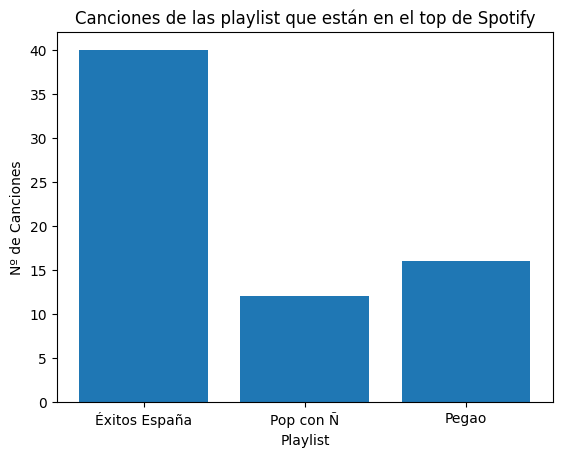

In [45]:
playlist = ['Éxitos España', 'Pop con Ñ', 'Pegao']
num_canciones = [40, 12, 16]

plt.bar(playlist, num_canciones)

plt.title('Canciones de las playlist que están en el top de Spotify')
plt.xlabel('Playlist')
plt.ylabel('Nº de Canciones')

plt.show()

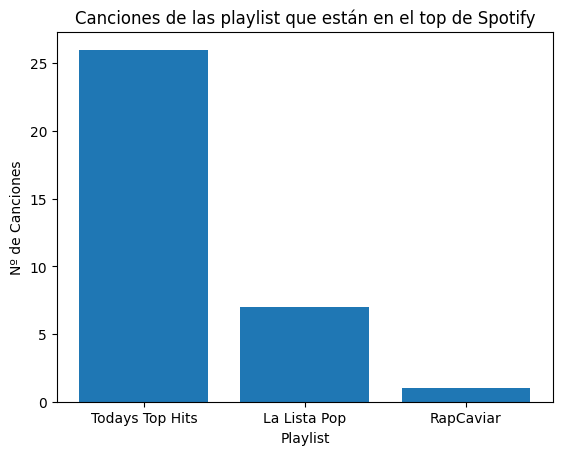

In [46]:
playlist = ['Todays Top Hits', 'La Lista Pop', 'RapCaviar']
num_canciones = [26, 7, 1]

plt.bar(playlist, num_canciones)

plt.title('Canciones de las playlist que están en el top de Spotify')
plt.xlabel('Playlist')
plt.ylabel('Nº de Canciones')

plt.show()

En definitiva, las multinacionales tienen cierto peso, sobre todo en el mundo hispano, a la hora de decirdir qué canciones entran en playlist editoriales pop, pero a la hora de la verdad el público elige un abanico más variado de opciones.